# Bank Marketing dataset - Data Analysis
## Data description - Studying the data
## Data cleaning
## Data exploratory analysis - Data Visualization

### Importing the required libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import plotly.graph_objects as pl

### Loading the dataset

In [11]:
#Getting the current working directory 
os.getcwd()

'/Users/aishwaryamaddimsetty/Downloads'

In [12]:
#Changing the working directory location to load the dataset.
os.chdir('/Users/aishwaryamaddimsetty/Downloads')

In [13]:
#Importing the dataset from my local computer and assigning it to a variable:
data = pd.read_csv('DSA.csv')

### Studying the dataset - basic summary statistics, understanding what the dataset comprises etc.

In [14]:
#Printing the first 5 rows of the dataset - just a look at the data
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [15]:
#Printing the number of rows and columns of the dataset:
data.shape

(41188, 22)

In [16]:
#Printing the details about the columns of the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

#### *This shows the data has no missing values so no handling required for missing data in data cleaning part*

In [17]:
#Printing the datatypes of the columns:
data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

In [18]:
#Printing the basic summary statistics of the dataset:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [19]:
#Printing the number of nulls in the dataset (though we know from above step(data.info) we have all non null columns):
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [21]:
#Small code to get counts of each category present in the data's catogorical columns:

category_column = [i for i in data.columns if data[i].dtypes == 'object']

for column in category_column:
    print(column, '\n\n')
    print(data[column].value_counts())
    print("---" *20)

job 


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------------------------------------
marital 


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------------------------------------------------------
education 


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------------------------------------------------------
default 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------

In [22]:
#Used the term 'target' as the variable, since that is our result
target_count = data['y'].value_counts()
target_count

no     36548
yes     4640
Name: y, dtype: int64

#### *Can infer from above analysis that the data is imbalanced, given that "Nos" are 88.73% of the dataset compared to the "Yes's".*


### Exploratory Data Analysis (EDA)- Data Visualization

In [27]:
#Analysing the column ('y') visually - Yess and Nos

colors = ['Red', 'Green']
trace = pl.Pie(labels =target_count.index, values = target_count.values, pull= [0.05], marker=dict(colors=colors)) 

layout = pl.Layout(title = "Subscribed to the Term Deposit", height = 200, legend= dict(x=1.1, y=1.3))



fig = pl.Figure(data=[trace], layout = layout)

fig.update_layout(height=500, width=600)
fig.show()


#### Visualization of the data based on data type of the columns 
#### (Categorical or Numerical).
#### Bar charts to understand the distribution of values within the column
#### Countplots to understand the distribution of values with in the column
#### and corresponding to target column ( Subscribed or Not)


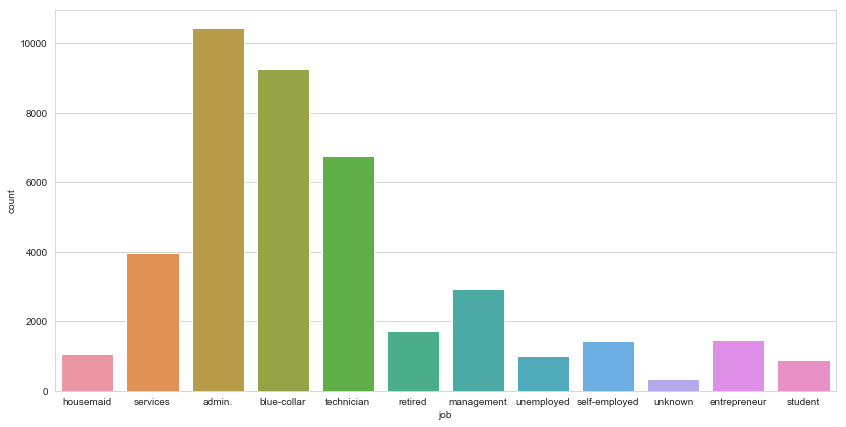

In [28]:
# Column - 'job'
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['job'])


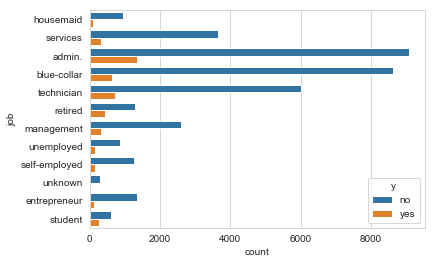

In [29]:
sns.countplot(y='job', hue= 'y', data = data)
plt.show()

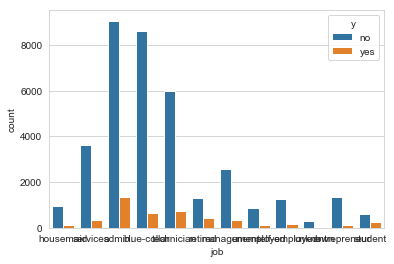

In [30]:
# Easy count plots:
sns.countplot(x='job', hue= 'y', data = data)
plt.show()



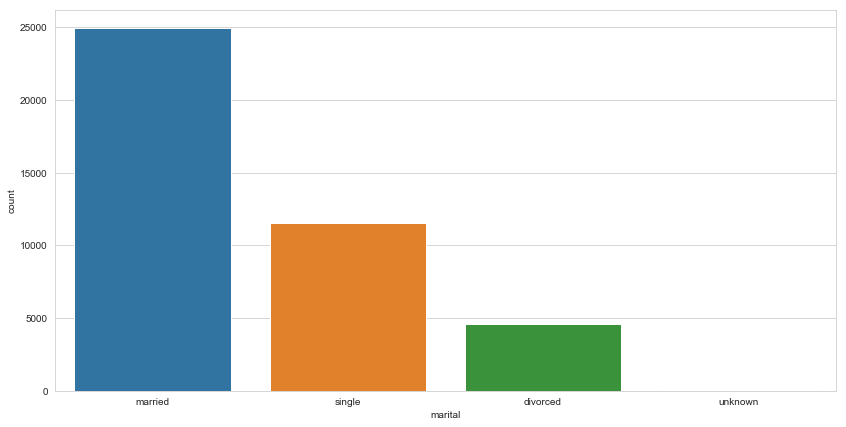

In [31]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['marital'])

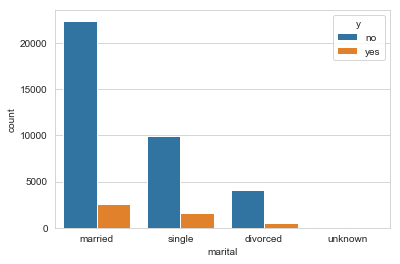

In [32]:
# Easy count plots:
sns.countplot(x='marital', hue= 'y', data = data)
plt.show()



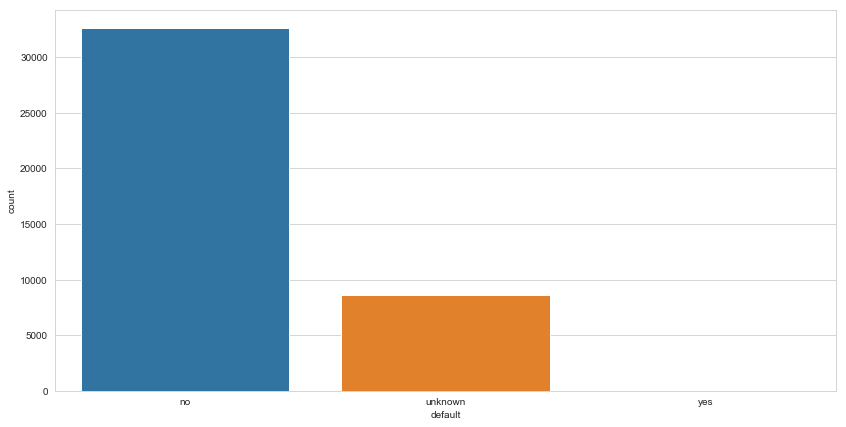

In [33]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['default'])

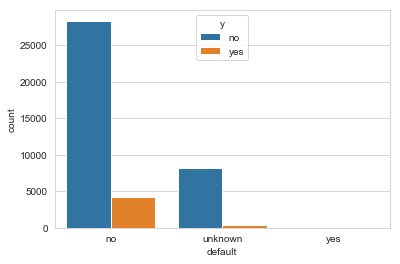

In [34]:
# Easy count plots:
sns.countplot(x='default', hue= 'y', data = data)
plt.show()



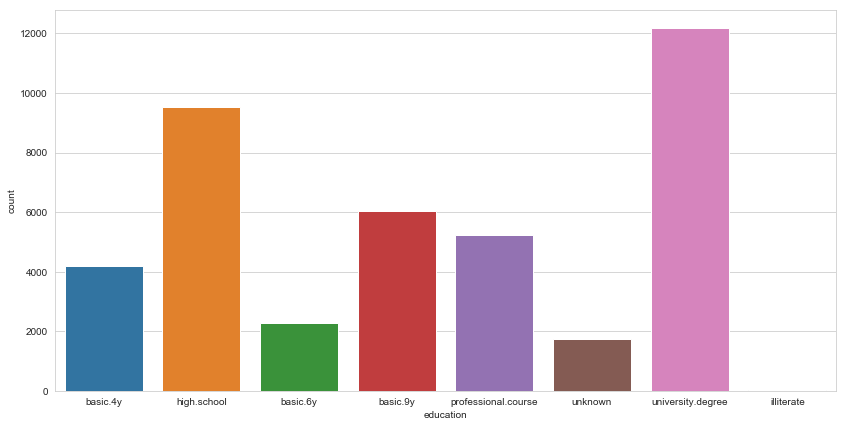

In [35]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['education'])

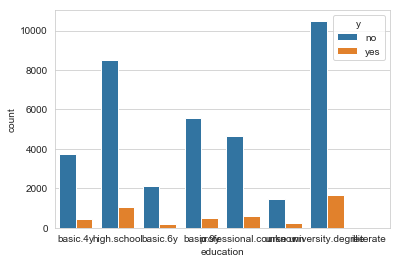

In [36]:
# Easy count plots:
sns.countplot(x='education', hue= 'y', data = data)
plt.show()



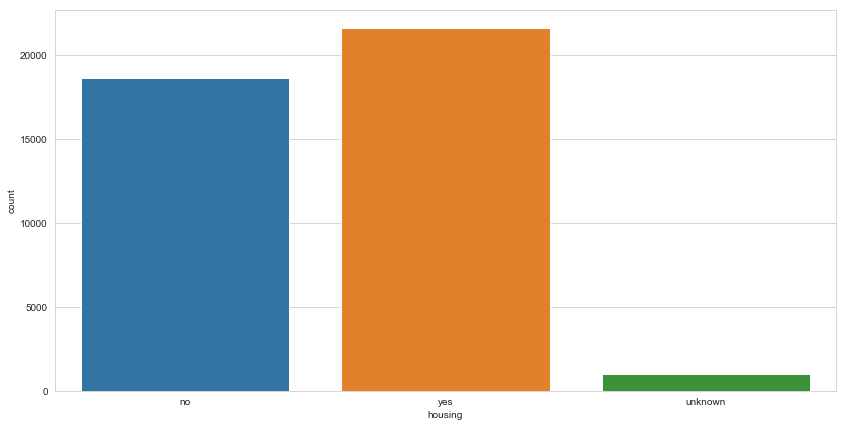

In [37]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['housing'])

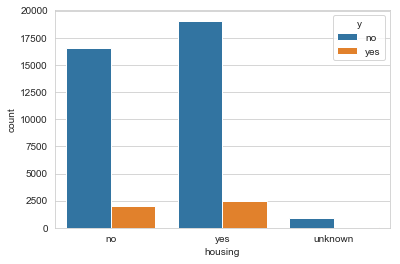

In [38]:
# Easy count plots:
sns.countplot(x='housing', hue= 'y', data = data)
plt.show()



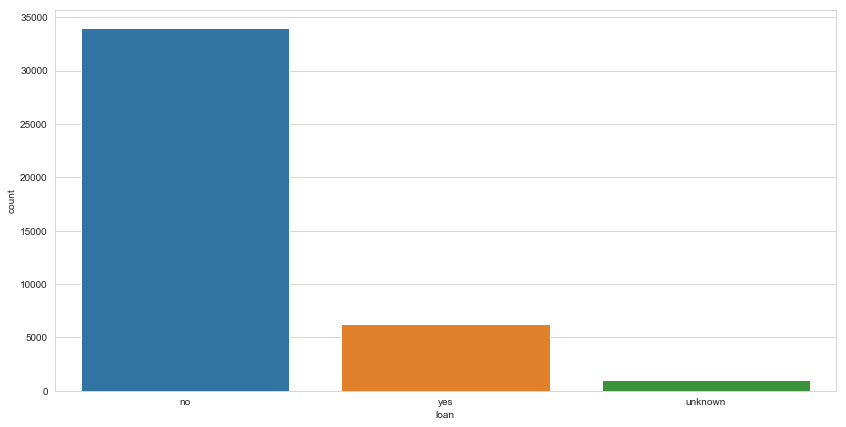

In [39]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['loan'])

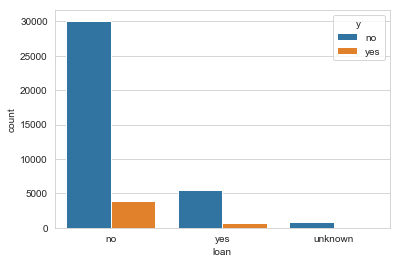

In [40]:
# Easy count plots:
sns.countplot(x='loan', hue= 'y', data = data)
plt.show()



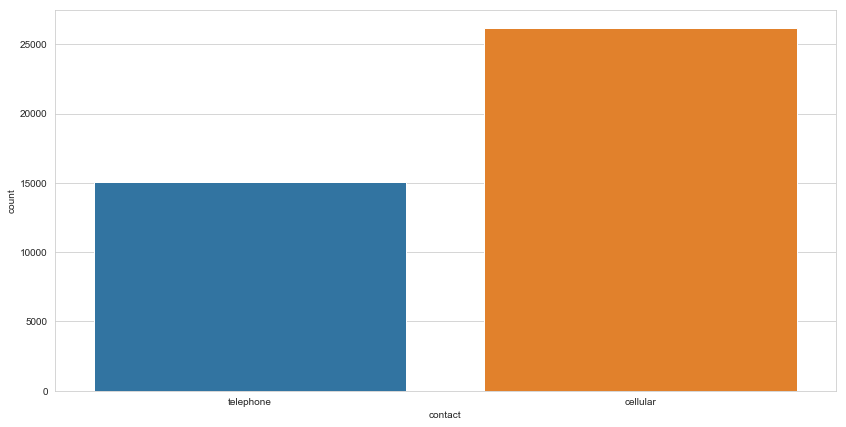

In [41]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['contact'])

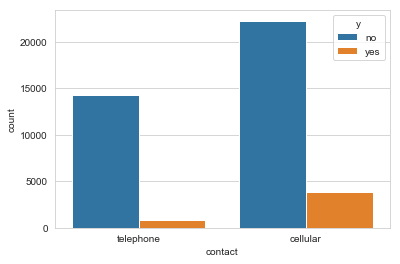

In [42]:
# Easy count plots:
sns.countplot(x='contact', hue= 'y', data = data)
plt.show()



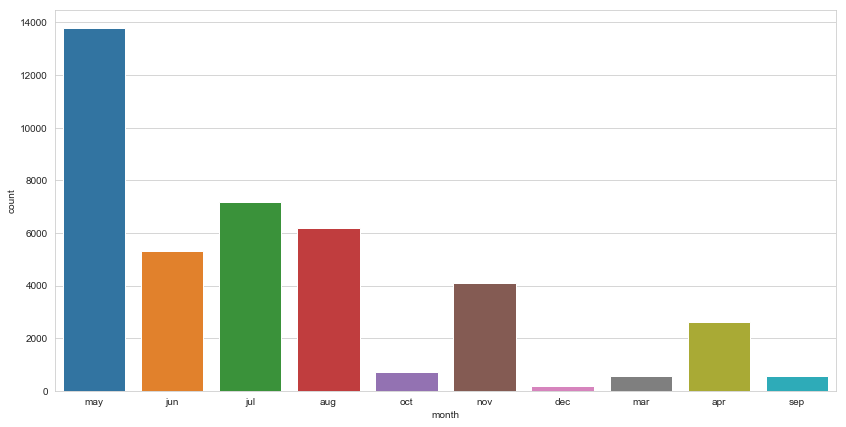

In [43]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['month'])

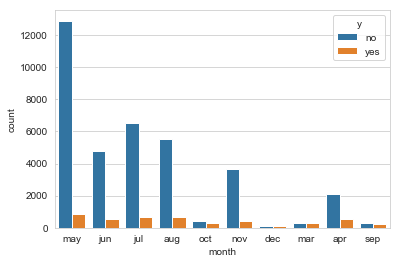

In [44]:
# Easy count plots:
sns.countplot(x='month', hue= 'y', data = data)
plt.show()



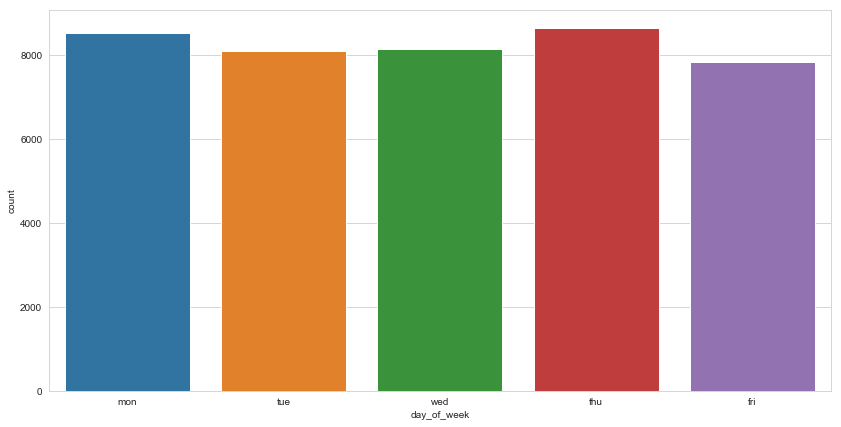

In [45]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['day_of_week'])

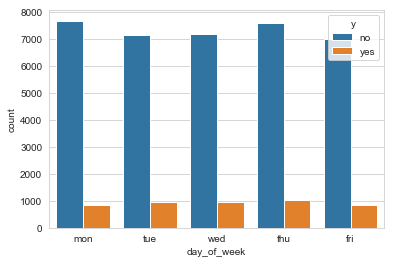

In [46]:
# Easy count plots:
sns.countplot(x='day_of_week', hue= 'y', data = data)
plt.show()



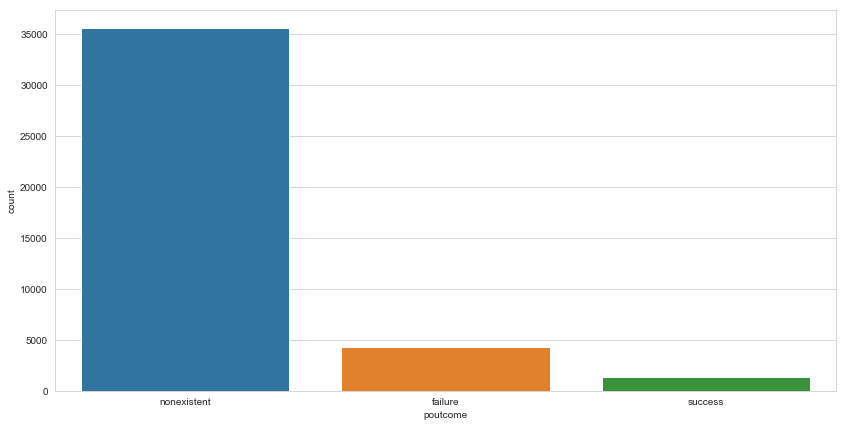

In [47]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['poutcome'])

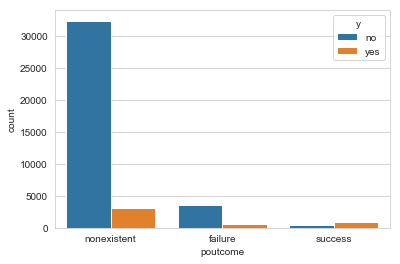

In [48]:
# Easy count plots:
sns.countplot(x='poutcome', hue= 'y', data = data)
plt.show()



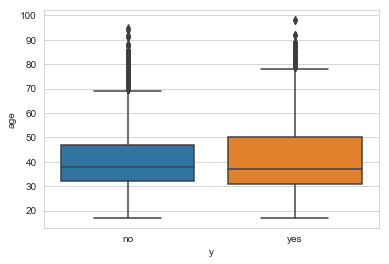

In [49]:
sns.boxplot(data = data, x = 'y', y = 'age')
plt.show()

#### *The boxplot above helps me understand that , the customers who are in this dataset (targeted in the campaign)'s median age is between 35 to 40.'*
####  *Both the boxplots ( Yes and No) have similar width ,meaning age isn't playing a significant role if people have subscribed or not*

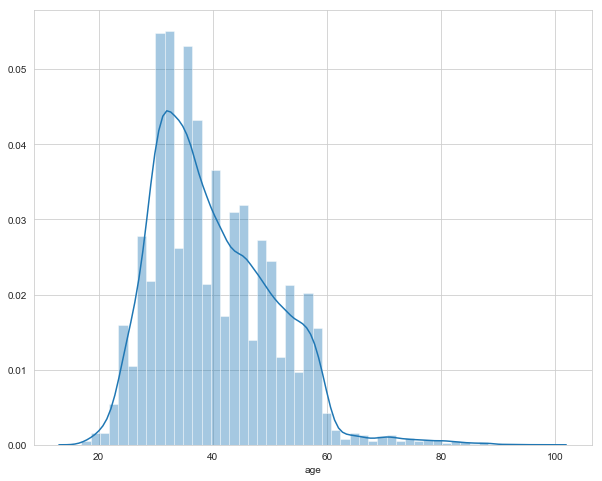

In [51]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

#### *As we can see in the above distribution also, that most of the customers are in the age range of 30-40.*

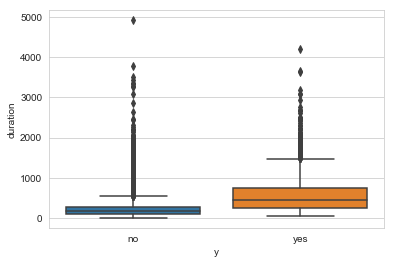

In [53]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

#### *From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.*

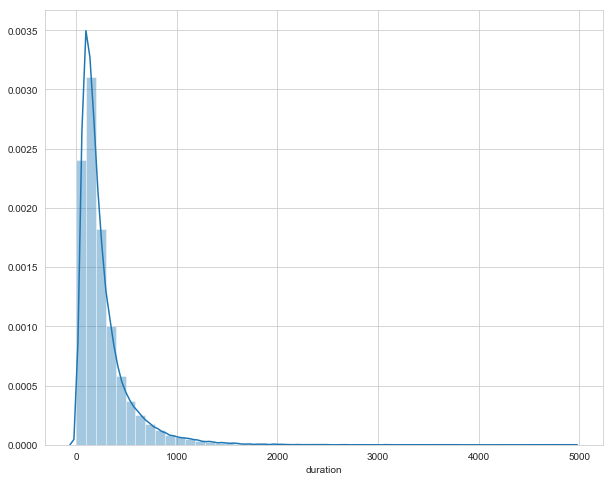

In [54]:

plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

#### *This seems like a powerlaw distribution where most the values are very low and very few have high values.*

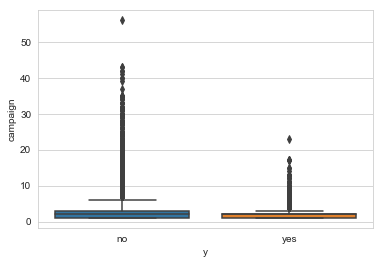

In [55]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

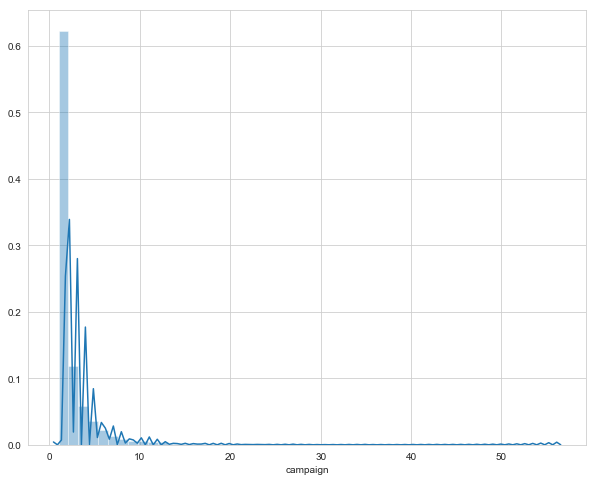

In [56]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

In [57]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [58]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

#### *Most of the values are 999, which means that the most of the customers have never been contacted before*

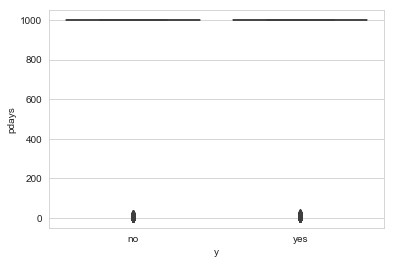

In [60]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

In [9]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64